In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pd.options.display.float_format = "{:.2f}".format

<img src="11.PNG"  style="width:900px;" align="center">

### Get the Data

In [4]:
transactions = pd.read_csv('./transactions.csv')

In [5]:
products = pd.read_csv('./products.csv')

In [6]:
markets = pd.read_csv('./markets.csv')

In [7]:
customers = pd.read_csv('./customers.csv')

In [8]:
date = pd.read_csv('./date.csv')

### Showing All the Tables

In [9]:
transactions.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.00,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR


In [10]:
products.sample(2)

,product_code,product_type
2,Prod003,Own Brand
10,Prod011,Own Brand


In [11]:
customers.sample(2)

,customer_code,custmer_name,customer_type
29,Cus030,Synthetic,E-Commerce
32,Cus033,All-Out,E-Commerce


In [12]:
markets.sample(2)

,markets_code,markets_name,zone
11,Mark012,Surat,North
0,Mark001,Chennai,South


In [13]:
date.sample(2)

,date,cy_date,year,month_name,date_yy_mmm
14,2017-06-15,2017-06-01,2017,June,17-Jun
825,2019-09-04,2019-09-01,2019,September,19-Sep


# Transactions

In [14]:
transactions.dtypes

product_code      object
customer_code     object
market_code       object
order_date        object
sales_qty          int64
sales_amount     float64
currency          object
dtype: object

### Check null values

In [15]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
dtype: int64

### sales_amout below 1

In [16]:
transactions[transactions['sales_amount'] <= 0].sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
26895,Prod104,Cus007,Mark004,2018-06-22,67,0.00,INR
17502,Prod065,Cus038,Mark006,2018-03-15,1,0.00,INR
137490,Prod318,Cus015,Mark003,2019-09-23,2,0.00,INR


In [17]:
len(transactions[transactions['sales_amount'] <= 0])

1611

In [18]:
transactions.shape

(150283, 7)

In [19]:
transactions.drop(transactions[transactions['sales_amount'] <= 0].index, inplace=True)

In [20]:
transactions.shape

(148672, 7)

### USD to INR conversation

In [21]:
transactions['currency'].unique()

array(['INR', 'USD'], dtype=object)

In [22]:
transactions[transactions['currency'] == 'USD']

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
6,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD
286,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
287,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD


In [23]:
transactions[transactions['currency'] == 'USD']['sales_amount']

5     500.00
6     250.00
286   500.00
287   250.00
Name: sales_amount, dtype: float64

In [24]:
val = transactions[transactions['currency'] == 'USD'].index

In [25]:
val

Index([5, 6, 286, 287], dtype='int64')

In [26]:
for x in val:
    transactions.at[x,'sales_amount'] = transactions.at[x,'sales_amount']*75
    transactions.at[x,'currency'] = 'INR'

In [27]:
transactions.loc[val]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR
6,Prod003,Cus005,Mark004,2017-11-22,36,18750.00,INR
286,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR
287,Prod003,Cus005,Mark004,2017-11-22,36,18750.00,INR


### Adding column product_price

In [28]:
transactions['product_price'] = transactions['sales_amount'] / transactions['sales_qty']

In [29]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00


In [30]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
product_price    0
dtype: int64

### Adding column original_price
#### original_price refers to product price without profit

In [31]:
def calc_perc(y):
    profit = 8
    
    if y > 4000:
        profit = 23
    elif y > 3000:
        profit = 19
    elif y > 2000:
        profit = 17
    elif y > 1000:
        profit = 15
    elif y > 500:
        profit = 13
    elif y > 100:
        profit = 11
    else:
        profit = 8
        
    return profit    

In [32]:
transactions['profit_percentage'] = transactions['product_price'].apply(calc_perc)

In [33]:
transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13


In [34]:
transactions.shape

(148672, 9)

In [35]:
transactions['profit_percentage'].isnull().sum()

0

In [36]:
transactions.isnull().sum()

product_code         0
customer_code        0
market_code          0
order_date           0
sales_qty            0
sales_amount         0
currency             0
product_price        0
profit_percentage    0
dtype: int64

In [37]:
transactions['original_price'] = (transactions['product_price'] - (transactions['product_price']*(transactions['profit_percentage'] / 100)))

In [38]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60


### Adding column profit

In [39]:
transactions['profit'] = transactions['product_price']*(transactions['profit_percentage'] / 100)

In [40]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40


### Adding Column total_profit

In [41]:
transactions['total_profit'] = (transactions['sales_qty'])*(transactions['product_price']*(transactions['profit_percentage'] / 100))

In [42]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40,1076.40


### Adding column total_cost

In [43]:
transactions['total_cost'] = (transactions['sales_amount'])-(transactions['total_profit'])

In [44]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40,1076.40,6099.60


### verifying values

In [45]:
transactions['sales_amount'].sum()

986676768.0

In [46]:
transactions['total_cost'].sum()

849375728.9

In [47]:
transactions['total_profit'].sum()

137301039.1

In [48]:
(transactions['total_cost'].sum() + transactions['total_profit'].sum()) - transactions['sales_amount'].sum()

0.0

In [49]:
transactions.shape

(148672, 13)

# Products

In [50]:
products.head(3)

,product_code,product_type
0,Prod001,Own Brand
1,Prod002,Own Brand
2,Prod003,Own Brand


In [51]:
products['product_type'].unique()

array(['Own Brand', 'Distribution'], dtype=object)

In [52]:
products['product_code'].nunique()

279

In [53]:
len(products[products['product_type'] == 'Own Brand'])

191

In [54]:
len(products[products['product_type'] == 'Distribution'])

88

In [55]:
transactions['product_code'].nunique()

338

In [56]:
prod_code1 = pd.Series(products['product_code'].unique())

In [57]:
prod_code2 = pd.Series(transactions['product_code'].unique())

In [58]:
prod_code1.tail()

274    Prod275
275    Prod276
276    Prod277
277    Prod278
278    Prod279
dtype: object

In [59]:
prod_code2.tail()

333    Prod335
334    Prod336
335    Prod337
336    Prod338
337    Prod339
dtype: object

In [60]:
def new_func():
    products = []  # Initialize products list
    for x in range(279, 338, 1):
        products.append({'product_code': prod_code2[x], 'product_type': 'Own Brand'})  # Append to products list

new_func()


In [61]:
products['product_code'].nunique()

279

In [62]:
products.tail()

,product_code,product_type
274,Prod275,Own Brand
275,Prod276,Own Brand
276,Prod277,Own Brand
277,Prod278,Distribution
278,Prod279,Distribution


In [63]:
transactions.shape

(148672, 13)

In [64]:
transactions2 = pd.merge(transactions, products, how='inner', on='product_code')

In [65]:
transactions2.sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type
44804,Prod129,Cus023,Mark002,2019-01-18,1,125.00,INR,125.00,11,111.25,13.75,13.75,111.25,Distribution
20158,Prod065,Cus010,Mark003,2020-01-24,2,509.00,INR,254.50,11,226.50,28.00,55.99,453.01,Own Brand
39127,Prod121,Cus020,Mark004,2020-01-16,1,231.00,INR,231.00,11,205.59,25.41,25.41,205.59,Distribution


In [66]:
transactions2.shape

(94073, 14)

# Customers

In [67]:
customers.head(3)

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar


In [68]:
customers['customer_type'].unique()

array(['Brick & Mortar', 'E-Commerce'], dtype=object)

In [69]:
customers['customer_type'].nunique()

2

In [70]:
customers['customer_code'].nunique()

38

In [71]:
transactions2['customer_code'].nunique()

38

In [72]:
transactions2.shape

(94073, 14)

In [73]:
transactions3 = pd.merge(transactions2, customers, how='inner', on='customer_code')

In [74]:
transactions3.sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type,custmer_name,customer_type
8502,Prod167,Cus003,Mark003,2018-10-31,1,194.00,INR,194.00,11,172.66,21.34,21.34,172.66,Own Brand,Excel Stores,Brick & Mortar
7711,Prod131,Cus003,Mark003,2019-11-27,1,449.00,INR,449.00,11,399.61,49.39,49.39,399.61,Distribution,Excel Stores,Brick & Mortar
1400,Prod235,Cus001,Mark010,2019-02-26,3,315.00,INR,105.00,11,93.45,11.55,34.65,280.35,Distribution,Surge Stores,Brick & Mortar


In [75]:
transactions3.shape

(94073, 16)

# Markets

In [76]:
markets.columns

Index(['markets_code', 'markets_name', 'zone'], dtype='object')

In [77]:
markets = markets.rename(columns={"markets_code": "market_code", "markets_name": "market_name"})

In [78]:
markets.head(3)

,market_code,market_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North


In [79]:
markets['market_name'].unique()

array(['Chennai', 'Mumbai', 'Ahmedabad', 'Delhi NCR', 'Kanpur',
       'Bengaluru', 'Bhopal', 'Lucknow', 'Patna', 'Kochi', 'Nagpur',
       'Surat', 'Hyderabad', 'Bhubaneshwar'], dtype=object)

In [80]:
markets['market_name'].nunique()

14

In [81]:
markets['zone'].unique()

array(['South', 'Central', 'North'], dtype=object)

In [82]:
markets['zone'].nunique()

3

In [83]:
markets['market_code'].nunique()

15

In [84]:
transactions3['market_code'].nunique()

15

In [85]:
transactions3.shape

(94073, 16)

In [86]:
transactions4 = pd.merge(transactions3, markets, how='inner', on='market_code')

In [87]:
transactions4.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type,custmer_name,customer_type,market_name,zone
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South
1,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South
2,Prod013,Cus001,Mark001,2017-10-10,240,143560.00,INR,598.17,13,520.40,77.76,18662.80,124897.20,Own Brand,Surge Stores,Brick & Mortar,Chennai,South


In [88]:
transactions4.shape

(94073, 18)

# Date

In [89]:
date.columns

Index(['date', 'cy_date', 'year', 'month_name', 'date_yy_mmm'], dtype='object')

In [90]:
date = date.rename(columns={"date": "order_date"})

In [91]:
date.head(3)

,order_date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun
1,2017-06-02,2017-06-01,2017,June,17-Jun
2,2017-06-03,2017-06-01,2017,June,17-Jun


In [92]:
date['order_date'].nunique()

1126

In [93]:
transactions4['order_date'].nunique()

801

In [94]:
transactions4.shape

(94073, 18)

In [95]:
transactions5 = pd.merge(transactions4, date, how='inner', on='order_date')

In [96]:
transactions5.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,...,total_cost,product_type,custmer_name,customer_type,market_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
1,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
2,Prod013,Cus001,Mark001,2017-10-10,240,143560.00,INR,598.17,13,520.40,...,124897.20,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct


In [97]:
transactions5.shape

(94073, 22)

# Save the file for Power BI

In [98]:
transactions5.to_csv('transactions_all.csv', index=False)

In [99]:
transactions5.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'product_price',
       'profit_percentage', 'original_price', 'profit', 'total_profit',
       'total_cost', 'product_type', 'custmer_name', 'customer_type',
       'market_name', 'zone', 'cy_date', 'year', 'month_name', 'date_yy_mmm'],
      dtype='object')

In [100]:
len(transactions5.columns)

22

In [101]:
transactions5.dtypes

product_code          object
customer_code         object
market_code           object
order_date            object
sales_qty              int64
sales_amount         float64
currency              object
product_price        float64
profit_percentage      int64
original_price       float64
profit               float64
total_profit         float64
total_cost           float64
product_type          object
custmer_name          object
customer_type         object
market_name           object
zone                  object
cy_date               object
year                   int64
month_name            object
date_yy_mmm           object
dtype: object

# Load the Data

In [102]:
df = pd.read_csv('./transactions_all.csv')

In [103]:
df.shape

(94073, 22)

In [104]:
df['sales_amount'].sum()

517715529.0

In [105]:
df['total_cost'].sum()

452453089.77

In [106]:
df['total_profit'].sum()

65262439.23000001

In [107]:
df['sales_amount'].sum() - (df['total_cost'].sum() + df['total_profit'].sum())

0.0

# Data Visualization

<Axes: xlabel='year', ylabel='total_cost'>

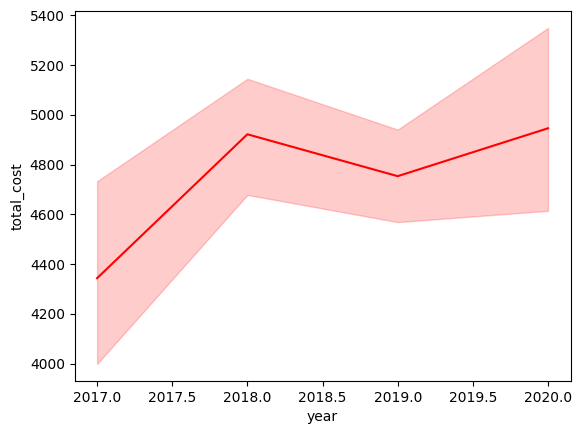

In [108]:
# visualization use displot
sns.lineplot(x='year', y='total_cost', color='red', data=df)

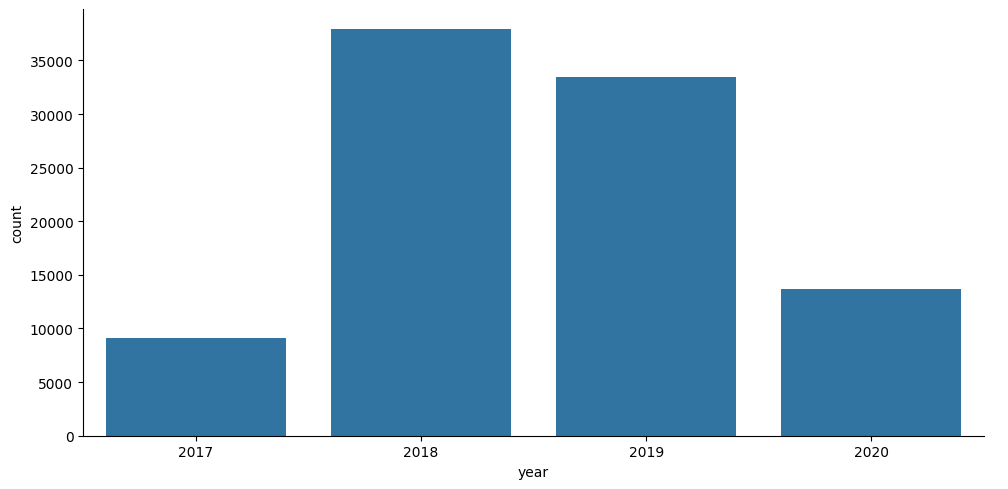

In [109]:
sns.catplot(x = "year", data=df, aspect=2, kind="count")

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94073 entries, 0 to 94072
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_code       94073 non-null  object 
 1   customer_code      94073 non-null  object 
 2   market_code        94073 non-null  object 
 3   order_date         94073 non-null  object 
 4   sales_qty          94073 non-null  int64  
 5   sales_amount       94073 non-null  float64
 6   currency           94073 non-null  object 
 7   product_price      94073 non-null  float64
 8   profit_percentage  94073 non-null  int64  
 9   original_price     94073 non-null  float64
 10  profit             94073 non-null  float64
 11  total_profit       94073 non-null  float64
 12  total_cost         94073 non-null  float64
 13  product_type       94073 non-null  object 
 14  custmer_name       94073 non-null  object 
 15  customer_type      94073 non-null  object 
 16  market_name        940

In [111]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()


<Axes: >

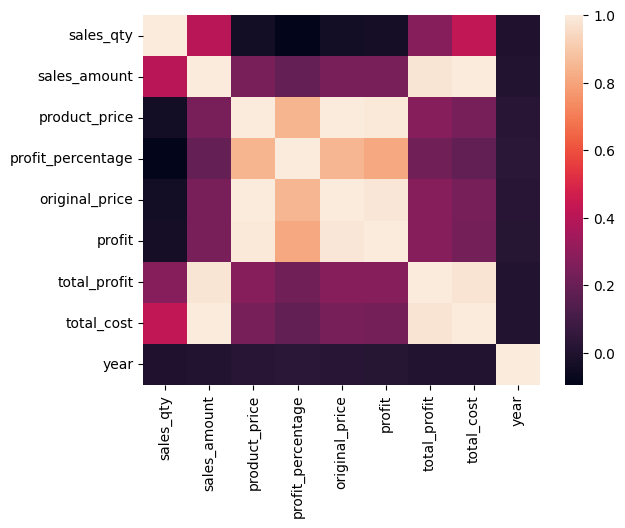

In [112]:
sns.heatmap(correlation_matrix)

<Axes: xlabel='total_cost', ylabel='sales_amount'>

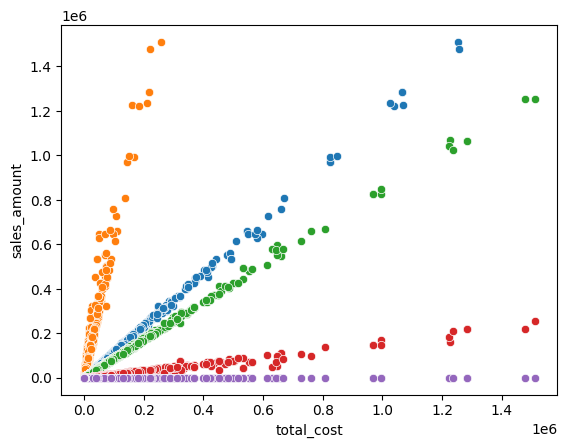

In [113]:
# Phân tích các yếu tố ảnh hưởng đến doanh số bán hàng

sns.scatterplot(x='total_cost', y='sales_amount', data=df)
sns.scatterplot(x='total_profit', y='sales_amount', data=df)
sns.scatterplot(x='sales_amount', y='total_cost', data=df)
sns.scatterplot(x='sales_amount', y='total_profit', data=df)
sns.scatterplot(x='sales_amount', y='profit_percentage', data=df)


## Dự báo doanh số bán hàng


In [129]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Chuẩn bị dữ liệu
# Chọn các cột liên quan cho mô hình
data = df[['order_date', 'product_code', 'sales_amount']]

# Đặt 'order_date' làm chỉ mục và sắp xếp lại dataframe
data['order_date'] = pd.to_datetime(data['order_date'])
data = data.set_index('order_date').sort_index()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Tạo tập huấn luyện và tập kiểm tra
time_steps = 7  # Số ngày liên tiếp sử dụng để dự đoán
X, y = [], []
for i in range(len(scaled_data) - time_steps):
     X.append(scaled_data[i:(i + time_steps), :])
     y.append(scaled_data[i + time_steps, 1])  # Chỉ lấy cột 'product_code'
X, y = np.array(X), np.array(y)

# Phân chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Đánh giá mô hình
train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print("Train RMSE:", train_rmse)

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("Test RMSE:", test_rmse)


C:\Users\thing\AppData\Local\Temp\ipykernel_9568\4100566338.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_date'] = pd.to_datetime(data['order_date'])


Epoch 1/100


c:\Users\thing\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2352/2352 - 11s - 5ms/step - loss: 2.4936e-04
Epoch 2/100
2352/2352 - 10s - 4ms/step - loss: 2.4239e-04
Epoch 3/100
2352/2352 - 10s - 4ms/step - loss: 2.4039e-04
Epoch 4/100
2352/2352 - 9s - 4ms/step - loss: 2.3972e-04
Epoch 5/100
2352/2352 - 9s - 4ms/step - loss: 2.3824e-04
Epoch 6/100
2352/2352 - 9s - 4ms/step - loss: 2.3805e-04
Epoch 7/100
2352/2352 - 9s - 4ms/step - loss: 2.3765e-04
Epoch 8/100
2352/2352 - 9s - 4ms/step - loss: 2.3729e-04
Epoch 9/100
2352/2352 - 12s - 5ms/step - loss: 2.3737e-04
Epoch 10/100
2352/2352 - 18s - 8ms/step - loss: 2.3689e-04
Epoch 11/100
2352/2352 - 9s - 4ms/step - loss: 2.3659e-04
Epoch 12/100
2352/2352 - 10s - 4ms/step - loss: 2.3640e-04
Epoch 13/100
2352/2352 - 9s - 4ms/step - loss: 2.3619e-04
Epoch 14/100
2352/2352 - 9s - 4ms/step - loss: 2.3636e-04
Epoch 15/100
2352/2352 - 10s - 4ms/step - loss: 2.3587e-04
Epoch 16/100
2352/2352 - 9s - 4ms/step - loss: 2.3577e-04
Epoch 17/100
2352/2352 - 9s - 4ms/step - loss: 2.3636e-04
Epoch 18/100
2352/2352 - 9s 

In [130]:
from sklearn.metrics import r2_score

# Tính R-squared trên tập huấn luyện
train_r2 = r2_score(y_train, train_pred)
print("Train R-squared:", train_r2)

# Tính R-squared trên tập kiểm tra
test_r2 = r2_score(y_test, test_pred)
print("Test R-squared:", test_r2)


Train R-squared: 0.05605741242490769
Test R-squared: 0.01592177685999352


In [132]:
from sklearn.metrics import mean_absolute_error

# Tính MAE trên tập huấn luyện
train_mae = mean_absolute_error(y_train, train_pred)
print("Train MAE:", train_mae)

# Tính MAE trên tập kiểm tra
test_mae = mean_absolute_error(y_test, test_pred)
print("Test MAE:", test_mae)


Train MAE: 0.005035991608267841
Test MAE: 0.005004051668867517


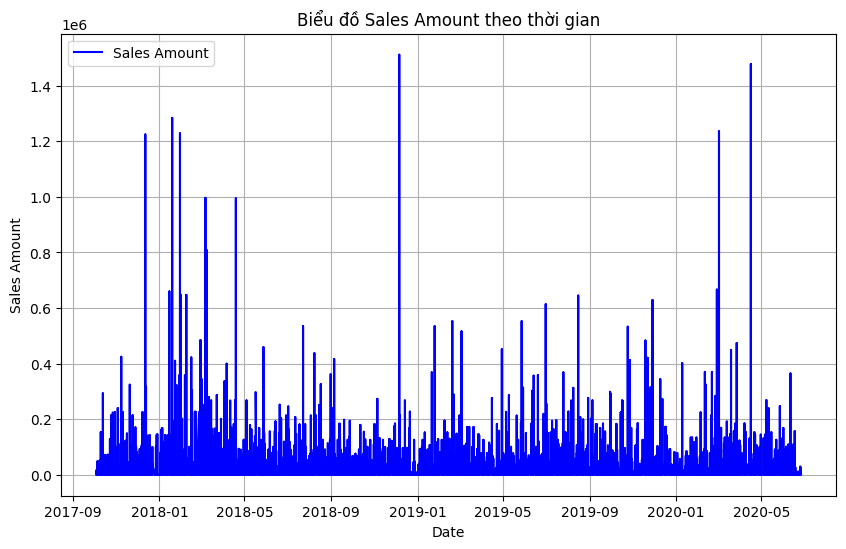

In [136]:
import matplotlib.pyplot as plt

# Tạo biểu đồ đường cho sales_amount theo thời gian
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['sales_amount'], label='Sales Amount', color='blue')
plt.title('Biểu đồ Sales Amount theo thời gian')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()
